# Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую одномерной линейной регрессии методом градиентного спуска.

In [26]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y))
    for i in range(epochs):
        y_current = m_current * X + b_current
        cost = (1./N) * sum([err**2 for err in (y-y_current)])
        
        m_gradient = (-2./N)*sum(X*(y-y_current))
        b_gradient = (-2./N)*sum(y-y_current)
        
        m_current = m_current - learning_rate * m_gradient
        b_current = b_current - learning_rate * b_gradient        
        
    return m_current, b_current, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


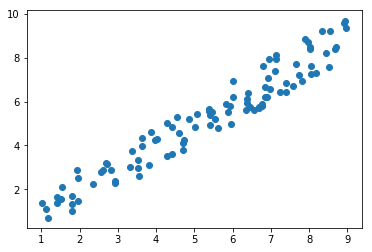

In [2]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x+b-delta,m*x+b+delta) for x in x])

plt.scatter(x,y)

### Обучим нашу линейную регрессию и посмотрим на результат

In [3]:
m, b, cost = linear_regression(x,y)

MSE: 34.93187526442218


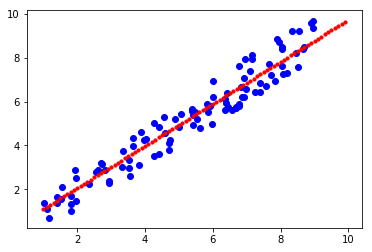

In [4]:
x_pr = np.arange(1,10,0.1)
y_pr = [m*elem+b for elem in x_pr] 

plt.scatter(x,y,color='blue')
plt.scatter(x_pr,y_pr,color='red',s=10)

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

epochs: 10, learning_rate: 0.1


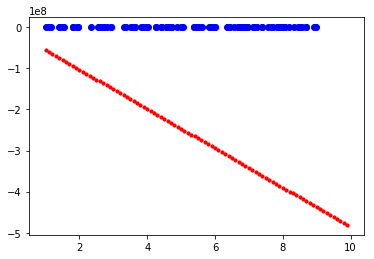

MSE: 2.3311296315018205e+17
epochs: 10, learning_rate: 0.01


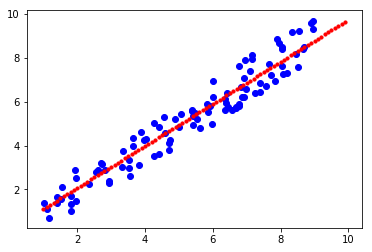

MSE: 34.93042405216376
epochs: 10, learning_rate: 0.0001


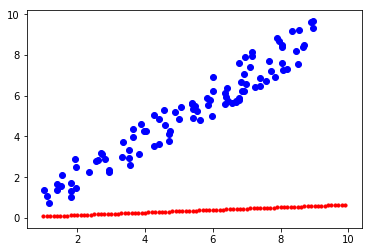

MSE: 2897.27681848738
epochs: 100, learning_rate: 0.1


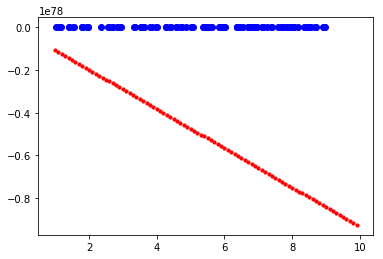

MSE: 8.627194702239965e+155
epochs: 100, learning_rate: 0.01


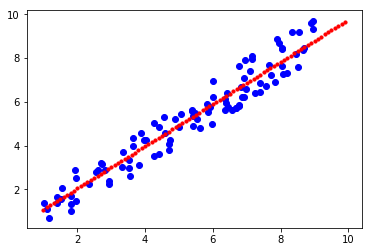

MSE: 34.79991456416079
epochs: 100, learning_rate: 0.0001


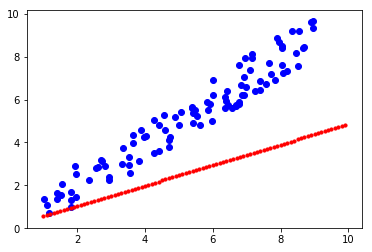

MSE: 860.136723145036
epochs: 1000, learning_rate: 0.1


C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
C:\Users\elena\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


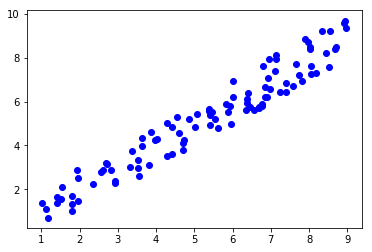

MSE: nan
epochs: 1000, learning_rate: 0.01


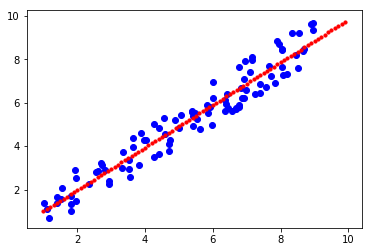

MSE: 34.61524257357215
epochs: 1000, learning_rate: 0.0001


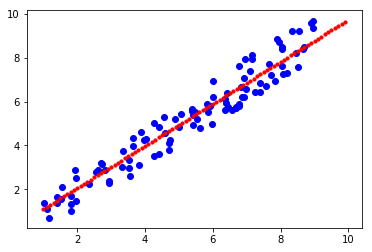

MSE: 34.93187526442218


In [6]:
x_pr = np.arange(1,10,0.1)

for ep in [10,100,1000]:
    for lr in [0.1,0.01,0.0001]:
        print('epochs: {0}, learning_rate: {1}'.format(ep,lr))
        m, b, cost = linear_regression(x,y,epochs=ep,learning_rate=lr)
        y_pr = [m*elem+b for elem in x_pr] 

        plt.scatter(x,y,color='blue')
        plt.scatter(x_pr,y_pr,color='red',s=10)
        plt.show()
        
        print('MSE: {}'.format(cost))        

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

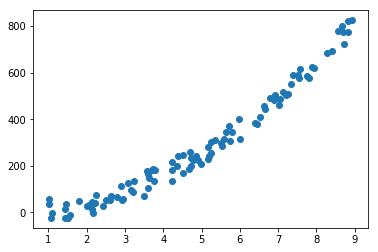

In [20]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])

plt.scatter(x,y)

In [18]:
x2

array([71.05070327,  6.51816333, 67.63391043, 10.1991495 ,  7.14909657,
        8.44273954, 29.85100847, 19.80907353, 37.11636559,  1.46042688,
       30.85824091, 39.74831772,  5.16145612, 15.95320561,  1.75538508,
       72.74735479, 39.51191585,  3.63180554, 56.63163043, 34.59460573,
       20.65494428, 34.147816  ,  2.35757824, 32.16549974, 28.06299008,
       65.66160475, 12.11374031,  3.0001776 , 63.37069747, 62.67967436,
       71.11872606, 33.98047831, 11.79498691, 72.18312116, 74.21490599,
        6.94444284,  1.05991791,  9.95270281, 62.13014722, 20.46392382,
       42.72313114, 44.83089149,  1.86748716, 68.79092809, 22.98001474,
        2.76372681, 45.08284857, 15.72938322,  1.1632168 , 30.06379725,
       58.87161678, 16.18290093,  2.75414793, 35.67519764, 41.04566806,
       12.2234    ,  9.79775657, 14.79775142, 43.53796643, 59.37972259,
       32.41228433, 11.76748334, 55.30091873, 12.95283526, 50.26558209,
       19.53960073, 15.50142383,  1.00440585, 33.07090471,  7.04

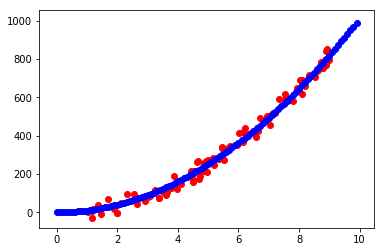

In [21]:
#your code here
x2 = np.array([el**2 for el in x])

m, b, cost = linear_regression(x2, y)

x = np.array([random.uniform(1,9) for i in range(num_points)])
y = np.array([random.uniform(m*x*x+b-delta,m*x*x+b+delta) for x in x])
plt.scatter(x,y,c='r')

# x_pr = np.arange(0,10,0.1)
# y_pr = [m * elem**2 + b for elem in x_pr]

x_pr2 = x_pr ** 2
y_pr = [m * elem + b for elem in x_pr2]


plt.scatter(x_pr,y_pr,c='b')

plt.show()

# Задание 3

Считайте файл weights_heights.csv

In [22]:
df = pd.read_csv("weights_heights.csv")
df.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Разбейте данные на тренировочную и валидационную часть и обучите линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [27]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(df['Height'],df['Weight'],test_size=0.2)

m,b,cost = linear_regression(Xtrain,ytrain,learning_rate=0.00001)

In [28]:
cost

106.9730879033862

Сделайте предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислите MSE на train и на test.

In [31]:
from sklearn.metrics import mean_squared_error

prediction_train = m * Xtrain + b
prediction_test = m * Xtest + b

mean_squared_error(ytrain, prediction_train), mean_squared_error(ytest, prediction_test)

(106.97308773063365, 106.71635975957994)

# Теперь проверим, как работает функция линейной регрессии из sklearn

In [32]:
from sklearn.linear_model import LinearRegression

Xtrain2 = Xtrain.values.reshape(-1,1)
Xtest2 = Xtest.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(Xtrain2,ytrain)

pred_train = lr.predict(Xtrain2)
pred_test = lr.predict(Xtest2)

print(mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest))

101.47493202261673 102.04940861402201


Посмотрим на качество линейной регрессии на кросс-валидации.

In [33]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=3, 
                       scoring='neg_mean_squared_error').mean())

101.61260513801402


# Задание 4

Поработаем с датасетом Бостон.

In [34]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
X_full = data.data
y_full = data.target

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации.

In [36]:
print(-cross_val_score(lr, X_full, y_full, cv=3, 
                       scoring='neg_mean_squared_error').mean())

169.00831238145477


Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_full,y_full,test_size=0.2)

lr = LinearRegression()
lr.fit(Xtrain, ytrain)

pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

mean_squared_error(pred_train,ytrain), mean_squared_error(pred_test,ytest)

(21.024978540945366, 26.585478799875897)

Нарисуем матрицу корреляций признаков.

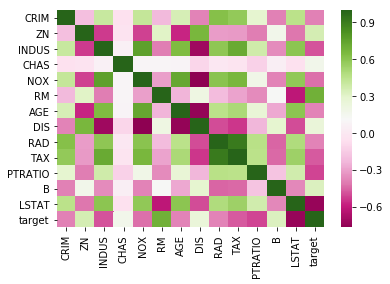

In [38]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

corr = data1.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="PiYG")

In [39]:
np.corrcoef(data1['LSTAT'],data1['target'])[0][1]

-0.7376627261740148

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here

# Задание 1 (закончить дома)

Визуализируйте процесс обучения линейной регрессии, а именно:

любым способом сделайте анимацию процесса обучения, т.е. выводите регрессионную линию через 10, 20, 30 и т.д. шагов градиентного спуска. Если получится сделать анимацию - хорошо. Но можно просто вывести несколько графиков подряд.

In [ ]:
#your code here

# Задание 2 (закончить дома)

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here